<span style="font-size:20px;">Packages and Libraries

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<span style="font-size:20px;">Data Preprocessing

In [372]:
train_data = pd.read_csv('ratings_movies.csv')
train_data.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [373]:
column_name_mapping = {
    'userId': 'UserID',
    'movieId': 'MovieID',
    'rating': 'Rating',
}
# Rename the columns using the mapping
train_data.rename(columns=column_name_mapping, inplace=True)

In [374]:
train_data.shape

(100836, 4)

In [375]:
train_data.head(3)

,UserID,MovieID,Rating,timestamp
0,1,1,4.000000,964982703
1,1,3,4.000000,964981247
2,1,6,4.000000,964982224


In [376]:
train_data.isnull().sum()

UserID       0
MovieID      0
Rating       0
timestamp    0
dtype: int64

In [377]:
train_data.duplicated().sum()

0

In [378]:
#Analysis of Movie Purchased by the user

no_of_movies_per_user = train_data.groupby(by='UserID')['MovieID'].count().sort_values(ascending=False)

no_of_movies_per_user.head(20)

UserID
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
249    1046
387    1027
182     977
307     975
603     943
298     939
177     904
318     879
232     862
480     836
Name: MovieID, dtype: int64

In [379]:
#Analysis of users who purchased movie

no_of_users_per_movies = train_data.groupby(by='MovieID')['UserID'].count().sort_values(ascending=False)

no_of_users_per_movies.head(20)

MovieID
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
2959    218
1       215
1196    211
50      204
2858    204
47      203
780     202
150     201
1198    200
4993    198
Name: UserID, dtype: int64

<span style="font-size:20px;">Data Analysis

In [380]:
# Basic statistics
num_users = train_data['UserID'].nunique()
num_movies = train_data['MovieID'].nunique()
num_ratings = train_data['Rating'].nunique()
print(f"Number of unique users: {num_users}")
print(f"Number of unique Movies: {num_movies}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique users: 610
Number of unique Movies: 9724
Number of unique ratings: 10


In [381]:
# Basic statistics
mean_ratings = train_data['Rating'].mean()
median_ratings = train_data['Rating'].median()
variance_ratings = train_data['Rating'].var()
std_ratings = train_data['Rating'].std()
highest_rating = train_data['Rating'].max()
lowest_rating = train_data['Rating'].min()
print(f"Mean of rating: {mean_ratings}")
print(f"Median of rating {median_ratings}")
print(f"Variance of rating: {variance_ratings}")
print(f"Standard Deviation of rating: {std_ratings}")
print(f"Highest rating: {highest_rating}")
print(f"Lowest rating: {lowest_rating}")

Mean of rating: 3.501556983616962
Median of rating 3.5
Variance of rating: 1.086867214296347
Standard Deviation of rating: 1.042529239060635
Highest rating: 5.0
Lowest rating: 0.5


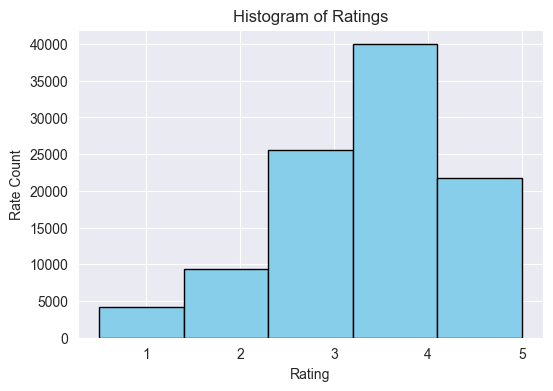

In [382]:
# Create a histogram for the 'Rating' data
plt.figure(figsize=(6, 4))
plt.hist(train_data['Rating'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Rate Count')
plt.show()

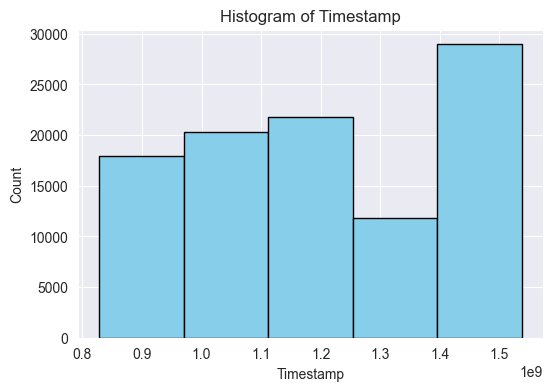

In [383]:
# Create a histogram for the 'Timestamp' data
plt.figure(figsize=(6, 4))
plt.hist(train_data['timestamp'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.show()

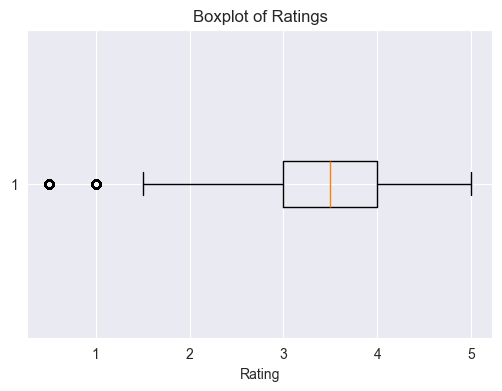

In [384]:
# Create a boxplot for the 'Rating' data
plt.figure(figsize=(6, 4))
plt.boxplot(train_data['Rating'], vert=False)
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()

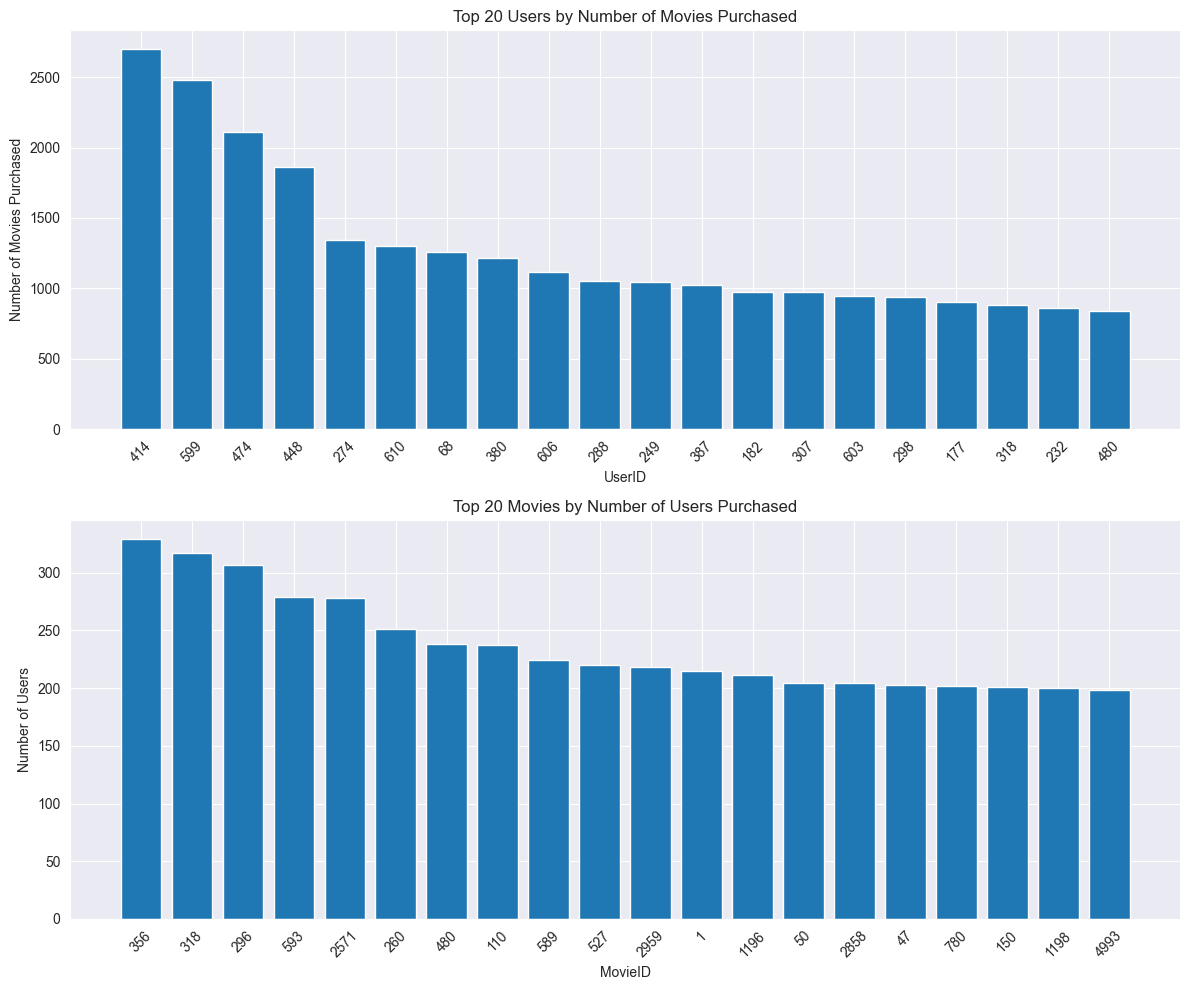

In [385]:
#user and movie interaction

# Generating x positions for the bars
x_positions_users = np.arange(len(no_of_movies_per_user.head(20).index))
x_positions_movies = np.arange(len(no_of_users_per_movies.head(20).index))


# Creating a figure with 2 subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plotting the top 20 users by number of movies purchased
axs[0].bar(x_positions_users, no_of_movies_per_user.head(20).values, align='center', width=0.8)
axs[0].set_title('Top 20 Users by Number of Movies Purchased')
axs[0].set_xlabel('UserID')
axs[0].set_ylabel('Number of Movies Purchased')
axs[0].set_xticks(x_positions_users)
axs[0].set_xticklabels(no_of_movies_per_user.head(20).index, rotation=45)

# Plotting the top 20 movies by number of users who purchased them
axs[1].bar(x_positions_movies, no_of_users_per_movies.head(20).values, align='center', width=0.8)
axs[1].set_title('Top 20 Movies by Number of Users Purchased')
axs[1].set_xlabel('MovieID')
axs[1].set_ylabel('Number of Users')
axs[1].set_xticks(x_positions_movies)
axs[1].set_xticklabels(no_of_users_per_movies.head(20).index, rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show both plots in a single output
plt.show()

In [386]:
# Descriptive statistics for these columns
numeric_stats = train_data['Rating'].describe()
pd.options.display.float_format = '{:.6f}'.format
numeric_stats

count   100836.000000
mean         3.501557
std          1.042529
min          0.500000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: Rating, dtype: float64

Correlation between number of rating and rating

In [387]:
# Step 1: Aggregate the data by 'MovieID' to get the number of ratings and the average rating
movie_stats = train_data.groupby('MovieID').agg(
    num_ratings=('Rating', 'count'),
    avg_rating=('Rating', 'mean')
).reset_index()

# Step 2: Calculate the correlation between 'num_ratings' and 'avg_rating'
correlation = movie_stats['num_ratings'].corr(movie_stats['avg_rating'])

print(f"Correlation between number of ratings and average rating: {correlation}")

Correlation between number of ratings and average rating: 0.12725857359560638


<font size="6"> Collaberative filtering (User-based)
<font size="3">

Firstly, let's understand how User-based collaborative filtering works.
User-based collaborative filtering makes recommendations based on user-item interactions in the past.

The assumption behind the algorithm is that similar users like similar movies.



User-based collaborative filtering algorithm usually has the following steps:

   1- Find similar users based on interactions with common items.
   
   2- Identify the items rated high by similar users but have not been exposed to the active user of interest.
   
   3- Calculate the weighted average score for each item.
   
   4- Rank items based on the score and pick top n items to recommend.


In [388]:
train_data.shape

(100836, 4)

<font size="6">Step 1:Adding Movies Name

We will add movies name to our dataset, let's read in the movies data to get the movie names.

The movies dataset has movieID, title, and genres.


In [389]:
# Read data
movies = pd.read_csv('movies.csv')

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


using 'movieId' as the matching key to 'MovieID'.

In [390]:
# Merge ratings and movies datasets
mtrain_data = pd.merge(train_data, movies, left_on='MovieID', right_on='movieId', how='left')

# Drop the duplicate column 'movieId' from the merged dataset
mtrain_data.drop(columns=['movieId'], inplace=True)

mtrain_data.head()

,UserID,MovieID,Rating,timestamp,title,genres
0,1,1,4.000000,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.000000,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.000000,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.000000,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.000000,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


<font size="6">Step 2: Exploratory Data Analysis (EDA)

We have around 100 thousand of rating, and most of the movies is not even famous like it only has 3 number of ratings. So we need to delete movies who have below n of ratings to make calculation manageable.

We will use num-of-rating each movie with range for example( >100 number of ratings) that means each user who rates a movie within the movie itself has <100 num of rating, it will get deleted.

In [391]:
# Aggregate by Movie ID
agg_ratings = mtrain_data.groupby('title').agg(mean_ratings = ('Rating', 'mean'), number_of_ratings = ('Rating', 'count')).reset_index()

#keep Movies with over 100 Rating
agg_rating_100 = agg_ratings[agg_ratings['number_of_ratings'] > 100]
agg_rating_100.info()
agg_rating_100.shape

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 74 to 9615
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              134 non-null    object 
 1   mean_ratings       134 non-null    float64
 2   number_of_ratings  134 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


(134, 3)

Now, we have top 134 movies left by number_of_rating. Let's check what the most popular movies and their number of ratings are.

In [392]:
#Check popular movies
agg_rating_100.sort_values(by= 'number_of_ratings', ascending=False).head()

,title,mean_ratings,number_of_ratings
3158,Forrest Gump (1994),4.164134,329
7593,"Shawshank Redemption, The (1994)",4.429022,317
6865,Pulp Fiction (1994),4.197068,307
7680,"Silence of the Lambs, The (1991)",4.161290,279
5512,"Matrix, The (1999)",4.192446,278


Next, let's use a jointplot to check the correlation between the average rating and the number of rating.
We can see an upward trend from scatter plot, showing that popular movies get higher ratings.

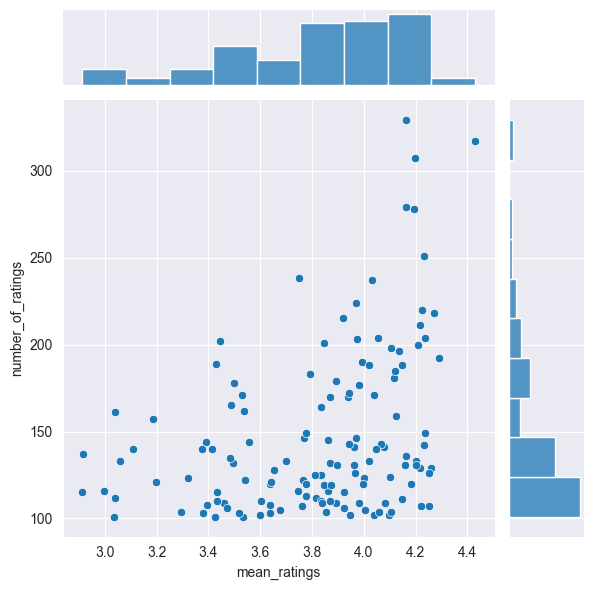

In [393]:
# Visualize
sns.jointplot(x='mean_ratings', y='number_of_ratings', data=agg_rating_100)

To keep only the 134 movies with more than 100 rating, we need to join the movie with the mtrain_data level dataframe.

how='inner' and on='title'. ensure that only the movies with more than 100 ratings are included.

In [394]:
#Merge data
train_data_100 = pd.merge(mtrain_data, agg_rating_100[['title']], on='title', how='inner')
train_data_100.shape


(19788, 6)

After filtering the movies with over 100 ratings, we have 567 users that rated 134 movies.

In [395]:
# Number of users
print('The ratings dataset has', train_data_100['UserID'].nunique(), 'unique users')

# Number of movies
print('The ratings dataset has', train_data_100['MovieID'].nunique(), 'unique movies')

The ratings dataset has 597 unique users
The ratings dataset has 134 unique movies


<font size="6"> Step 3: Create User-Movie Matrix

In step 2: we will transform the dataset into a matrix format. The rows of the matrix are users, and the columns of the matrix are movies, The
value of the matrix is the user rating of the movie if there is a rating, Otherwise, it shows 'NaN'.

In [396]:
# Create User-Product matrix
matrix = train_data_100.pivot_table(index='UserID', columns='title', values='Rating')
matrix.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,4.000000,NaN,NaN,5.000000,5.000000,NaN,4.000000,...,NaN,NaN,NaN,3.000000,NaN,5.000000,NaN,NaN,5.000000,5.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4.000000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,...,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN
5,NaN,3.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN


<font size="6"> Step 4: Data Normalization

Since some people tend to give a higher rating than others, we normalize the rating by extracting the average rating of each user.

After normalization, the products with a rating less than the user's average rating get a negative value, and the products with a rating more than the 
user's average rating get a positive value. 

In [397]:
# Normalize user-product matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis='rows')
matrix_norm.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,-0.392857,NaN,NaN,0.607143,0.607143,NaN,-0.392857,...,NaN,NaN,NaN,-1.392857,NaN,0.607143,NaN,NaN,0.607143,0.607143
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.617647,NaN,NaN,NaN,1.617647,NaN,NaN,NaN,...,NaN,NaN,-1.382353,NaN,NaN,NaN,NaN,NaN,0.617647,NaN
5,NaN,-0.461538,0.538462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.461538,NaN,NaN,NaN,NaN,0.538462,NaN,NaN,NaN,NaN


<font size="6"> Step 5: Identify Similar Users (Pearson Correlation)


we will calculate the user similarity matrix using Pearson correlation

In [398]:
# User similarity matrix using Pearson correlation
user_similarity = matrix_norm.T.corr()
user_similarity.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,NaN,0.391797,0.180151,-0.439941,-0.029894,0.464277,1.000000,-0.037987,...,0.091574,0.254514,0.101482,-0.500000,0.780020,0.303854,-0.012077,0.242309,-0.175412,0.071553
2,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,-0.583333,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.229416,NaN,0.765641
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.391797,NaN,NaN,1.000000,-0.394823,0.421927,0.704669,0.055442,NaN,0.360399,...,-0.239325,0.562500,0.162301,-0.158114,0.905134,0.021898,-0.020659,-0.286872,NaN,-0.050868
5,0.180151,NaN,NaN,-0.394823,1.000000,-0.006888,0.328889,0.030168,NaN,-0.777714,...,0.000000,0.231642,0.131108,0.068621,-0.245026,0.377341,0.228218,0.263139,0.384111,0.040582


Now let's use user ID 1 as an example to illustrate how to find similar users.

We first need to exclude user ID 1 from the similar user list and decide the number of similar users.

In [399]:
# Pick a user ID
picked_userid = 1

# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)

# Take a look at the data
user_similarity.head(10)

UserID,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
UserID,,,,,,,,,,,,,,,,,,,,,
2,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,-0.583333,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.229416,NaN,0.765641
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.391797,NaN,NaN,1.000000,-0.394823,0.421927,0.704669,0.055442,NaN,0.360399,...,-0.239325,0.562500,0.162301,-0.158114,0.905134,0.021898,-0.020659,-0.286872,NaN,-0.050868
5,0.180151,NaN,NaN,-0.394823,1.000000,-0.006888,0.328889,0.030168,NaN,-0.777714,...,0.000000,0.231642,0.131108,0.068621,-0.245026,0.377341,0.228218,0.263139,0.384111,0.040582
6,-0.439941,NaN,NaN,0.421927,-0.006888,1.000000,0.000000,-0.127385,NaN,0.957427,...,-0.292770,-0.030599,-0.123983,-0.176327,0.063861,-0.468008,0.541386,-0.337129,0.158255,-0.030567
7,-0.029894,NaN,NaN,0.704669,0.328889,0.000000,1.000000,0.220416,0.816497,-0.349835,...,-0.116141,0.110432,0.290485,0.560968,0.351779,0.154338,0.374808,0.058785,0.420288,-0.043057
8,0.464277,NaN,NaN,0.055442,0.030168,-0.127385,0.220416,1.000000,NaN,-1.000000,...,1.000000,0.031051,0.285443,0.501249,-0.206859,0.309634,0.281876,0.362413,0.104828,0.167931
9,1.000000,NaN,NaN,NaN,NaN,NaN,0.816497,NaN,1.000000,NaN,...,0.577350,NaN,0.000000,NaN,NaN,-0.262613,NaN,0.073324,NaN,1.000000
10,-0.037987,1.000000,NaN,0.360399,-0.777714,0.957427,-0.349835,-1.000000,NaN,1.000000,...,-0.294516,-0.944911,-0.789285,-1.000000,0.584075,-0.584677,-1.000000,-0.544342,NaN,-0.246110


In the user similarity matrix, the values range from -1 to 1, where -1 means opposite movie preference and 1 means same movie preference.

n = 10 means we would like to pick the top 10 most similar users for user ID 1.

The user-based collaborative filtering makes recommendations based on users with similar tastes, so we need to set a positive threshold. Here we set the user_similarity_threshold to be 0.3, meaning that a user must have a Pearson correlation coefficient of at least 0.3 to be considered as a similar user.

After setting the number of similar users and similarity threshold, we sort the user similarity value from the highest and lowest, then printed out the most similar users' ID and the Pearson correlation value

In [400]:
# Number of similar users
n = 10

# User similarity threashold
user_similarity_threshold = 0.3

# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 1 are UserID
108   1.000000
9     1.000000
550   1.000000
598   1.000000
502   1.000000
401   0.942809
511   0.925820
366   0.872872
154   0.866025
595   0.866025
Name: 1, dtype: float64


<font size="6"> Step 6: Narrow Down Item Pool

In step 6, we will narrow down the item pool by doing the following:

   1-Remove the movies that have been watched by the target user (user ID 1 in this example).
   2-Keep only the movies that similar users have watched.
To remove the movies watched by the target user, we keep only the row for userId=1 in the user-item matrix and remove the items with missing values.

In [408]:
# Movies that the target user has watched
picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_watched

title,Alien (1979),American Beauty (1999),American History X (1998),Apocalypse Now (1979),Back to the Future (1985),Batman (1989),"Big Lebowski, The (1998)",Braveheart (1995),Clear and Present Danger (1994),Clerks (1994),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Stargate (1994),"Terminator, The (1984)",Toy Story (1995),Twister (1996),"Usual Suspects, The (1995)",Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
UserID,,,,,,,,,,,,,,,,,,,,,
1,-0.392857,0.607143,0.607143,-0.392857,0.607143,-0.392857,0.607143,-0.392857,-0.392857,-1.392857,...,0.607143,0.607143,0.607143,-1.392857,0.607143,-0.392857,-1.392857,0.607143,0.607143,0.607143


In [402]:
# Movies that similar users watched. Remove movies that none of the similar users have watched
similar_user_movies = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_movies

title,Aladdin (1992),Alien (1979),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",Back to the Future (1985),Batman Begins (2005),"Beautiful Mind, A (2001)",Beauty and the Beast (1991),Blade Runner (1982),"Bourne Identity, The (2002)",Braveheart (1995),...,Shrek (2001),"Silence of the Lambs, The (1991)",Spider-Man (2002),Star Wars: Episode I - The Phantom Menace (1999),Terminator 2: Judgment Day (1991),Titanic (1997),Toy Story (1995),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008)
UserID,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,0.466667,0.466667,NaN,0.466667,NaN,0.466667,NaN,NaN,...,NaN,NaN,0.466667,NaN,NaN,-0.533333,NaN,NaN,NaN,NaN
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214286,NaN,NaN
366,NaN,NaN,NaN,NaN,-0.205882,NaN,NaN,NaN,NaN,-0.205882,...,NaN,NaN,NaN,NaN,-0.205882,NaN,NaN,NaN,NaN,NaN
401,-0.382353,NaN,NaN,NaN,NaN,NaN,-0.382353,NaN,NaN,NaN,...,0.117647,NaN,NaN,NaN,NaN,NaN,0.117647,0.617647,NaN,0.617647
502,NaN,-0.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511,NaN,NaN,-0.653846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-1.153846,-0.653846,NaN,NaN,NaN,-0.153846,NaN,NaN
550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.277778,0.222222,NaN,-0.277778
595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.333333,NaN,NaN,NaN,NaN,0.666667,NaN


Next, we will drop the movies that user ID 1 watched from the similar user movie list. errors='ignore' drops columns if they exist without giving an error message.

In [403]:
# Remove the watched movie from the movie list
similar_user_movies.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')

# Take a look at the data
similar_user_movies

title,Aladdin (1992),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",Batman Begins (2005),"Beautiful Mind, A (2001)",Beauty and the Beast (1991),Blade Runner (1982),"Bourne Identity, The (2002)","Breakfast Club, The (1985)",Catch Me If You Can (2002),"Dark Knight, The (2008)",...,"Monsters, Inc. (2001)",Ocean's Eleven (2001),Pirates of the Caribbean: The Curse of the Black Pearl (2003),"Shawshank Redemption, The (1994)",Shrek (2001),Spider-Man (2002),Terminator 2: Judgment Day (1991),Titanic (1997),Up (2009),WALL·E (2008)
UserID,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,0.466667,NaN,0.466667,NaN,0.466667,NaN,-0.533333,0.466667,NaN,...,NaN,NaN,NaN,NaN,NaN,0.466667,NaN,-0.533333,NaN,NaN
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214286,NaN
366,NaN,NaN,-0.205882,NaN,NaN,NaN,NaN,NaN,NaN,-0.205882,...,NaN,NaN,-0.205882,NaN,NaN,NaN,-0.205882,NaN,NaN,NaN
401,-0.382353,NaN,NaN,NaN,-0.382353,NaN,NaN,NaN,NaN,NaN,...,0.117647,NaN,0.117647,NaN,0.117647,NaN,NaN,NaN,0.617647,0.617647
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.125000,NaN,NaN,NaN,NaN,NaN,NaN
511,NaN,-0.653846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.346154,NaN,-1.153846,NaN,NaN,-0.153846,NaN
550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.277778,-0.277778,...,NaN,NaN,NaN,0.222222,NaN,NaN,NaN,NaN,0.222222,-0.277778
595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font size="6"> Step 7: Recommend Items

In step 7, we will decide which movie to recommend to the target user. The recommended items are determined by the weighted average of user similarity score and movie rating. The movie ratings are weighted by the similarity scores, so the users with higher similarity get higher weights.

This code loops through items and users to get the item score, rank the score from high to low and pick the top 10 movies to recommend to user ID 1.

In [404]:
# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_movies.columns:
  # Get the ratings for movie i
  movie_rating = similar_user_movies[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the movie has rating
    if pd.isna(movie_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the movie rating
      score = similar_users[u] * movie_rating[u]
      # Add the score to the total score for the movie so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])

# Sort the movies by score
ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)

# Select top m movies
m = 10
ranked_item_score.head(m)

,movie,movie_score
16,Harry Potter and the Chamber of Secrets (2002),1.888889
13,Eternal Sunshine of the Spotless Mind (2004),1.888889
6,"Bourne Identity, The (2002)",0.888889
29,Ocean's Eleven (2001),0.888889
18,Inception (2010),0.587491
3,"Beautiful Mind, A (2001)",0.466667
5,Blade Runner (1982),0.466667
12,Donnie Darko (2001),0.466667
10,"Departed, The (2006)",0.256727
31,"Shawshank Redemption, The (1994)",0.222566


<font size="6"> Populartiy-Based Filtering 

focusing on identifying trending content. It leverages the number of ratings within a specific period (e.g., 2002) to rank items,

highlighting what is currently popular among users. It's time-sensitive and works well for promoting seasonal or trending content.

In [405]:
mtrain_data.head()

,UserID,MovieID,Rating,timestamp,title,genres
0,1,1,4.000000,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.000000,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.000000,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.000000,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.000000,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


<font size="6"> 1. Overall Popularity

Rank movies by the total number of ratings they have received across the entire dataset.

In [406]:
# Group by movie title and count the total number of ratings
overall_popularity = mtrain_data.groupby('title')['Rating'].count().reset_index()

# Rename columns for clarity
overall_popularity.columns = ['Title', 'Num_Ratings']

# Sort by the number of ratings in descending order
overall_popularity = overall_popularity.sort_values(by='Num_Ratings', ascending=False)

# Display the top trending movies
overall_popularity.head(10)

,Title,Num_Ratings
3158,Forrest Gump (1994),329
7593,"Shawshank Redemption, The (1994)",317
6865,Pulp Fiction (1994),307
7680,"Silence of the Lambs, The (1991)",279
5512,"Matrix, The (1999)",278
8001,Star Wars: Episode IV - A New Hope (1977),251
4662,Jurassic Park (1993),238
1337,Braveheart (1995),237
8363,Terminator 2: Judgment Day (1991),224
7421,Schindler's List (1993),220


<font size="6"> 2. Average Rating Popularity

Rank movies by their average rating instead of the count. This highlights the highest-rated movies.

In [407]:
# Group by movie title and calculate the average rating
average_rating_popularity = mtrain_data.groupby('title')['Rating'].mean().reset_index()

# Rename columns for clarity
average_rating_popularity.columns = ['Title', 'Avg_Rating']

# Sort by average rating in descending order
average_rating_popularity = average_rating_popularity.sort_values(by='Avg_Rating', ascending=False)

# Display the top movies by average rating
average_rating_popularity.head(10)

,Title,Avg_Rating
3354,Gena the Crocodile (1969),5.000000
8951,True Stories (1986),5.000000
1986,Cosmic Scrat-tastrophe (2015),5.000000
5269,Love and Pigeons (1985),5.000000
7033,Red Sorghum (Hong gao liang) (1987),5.000000
8661,"Thin Line Between Love and Hate, A (1996)",5.000000
5019,Lesson Faust (1994),5.000000
2799,Eva (2011),5.000000
9435,Who Killed Chea Vichea? (2010),5.000000
7662,Siam Sunset (1999),5.000000
